# THE SPARKS FOUNDATION

## Data Science and Business Analytics Intern - September 2021

### Task 1: Prediction using Supervised Learning
  
**`Problem Statement:`** Predicting the percentage of a student based on the number of study hours.

What will be the predicted score, if a student studies for 9.25 hours per day?

***Author: MAMATHA E***

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#### Understanding the Data

In [2]:
# Read data and store it in a dataframe
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Finding the dataset size
data.shape

(25, 2)

In [4]:
# Checking the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# Checking statistical info
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**`Inference:`** Here, in the data set 'Hours' is independent variable and 'Scores' is dependent variable. Since, the data set contains only one independent variable, it is an case/situation of Simple Linear Regression Model.

In [6]:
# Checking for null values
data.isnull().sum()/len(data)*100

Hours     0.0
Scores    0.0
dtype: float64

**`Inference:`** There is no null values present in the data set.

#### Visualising the Data

Performing bivariate analysis using scatterplot as both variables are numeric variables.

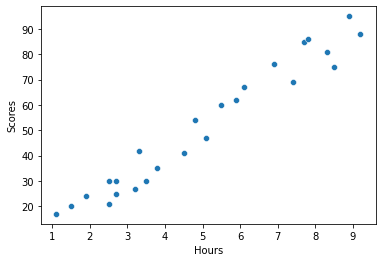

In [7]:
# Viewing the relationship between 'Hours' and 'Scores'.
sns.scatterplot(data.Hours, data.Scores)
plt.show()

**`Inference:`** From the above plot, it can be said that there is a linear relationship between 'Hours' and 'Scores'.

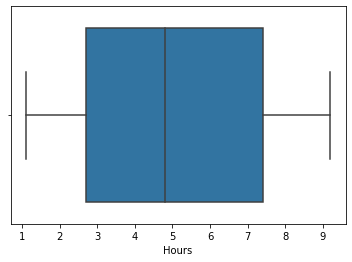

In [8]:
# Checking for Outliers
sns.boxplot(data.Hours)
plt.show()

**`Inference:`** There is no outliers in the dataset.

#### Data Preparation

In [9]:
# Create X and y
X = data.iloc[:,:-1].values
X.shape

(25, 1)

In [10]:
y = data.Scores
y.shape

(25,)

In [11]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [12]:
# Performing train-test split of 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

#### Model Building

In [13]:
# Build and fit a Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lr_model.coef_)
print(lr_model.intercept_)

[9.91065648]
2.018160041434662


In [15]:
# Predictions on Train Set 
y_train_pred = lr_model.predict(X_train)

In [16]:
# Predictions on Test Set
y_test_pred = lr_model.predict(X_test)

In [17]:
# Comparing the actual and predicted scores of the test data set
temp_df = pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
temp_df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


#### Model Evaluation

In [18]:
# Evaluation on training set
print('Training Set:')
print('R2_Score: ',r2_score(y_train, y_train_pred))
print('MAE: ', mean_absolute_error(y_train, y_train_pred))

# Evaluation on testing set
print('--------------------------------')
print('Testing Set:')
print('R2_Score: ',r2_score(y_test, y_test_pred))
print('MAE: ', mean_absolute_error(y_test, y_test_pred))

Training Set:
R2_Score:  0.9515510725211552
MAE:  5.186601709180373
--------------------------------
Testing Set:
R2_Score:  0.9454906892105354
MAE:  4.183859899002982


**`Inference:`** So, considering the test data, 94% variation on the target variable 'Scores' is explained by the independent variable 'Hours' of the model built.

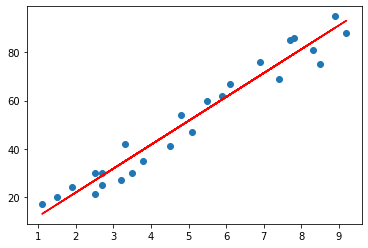

In [19]:
# Finding the best fit line on the data i.e., y = bx + c
line = lr_model.coef_*X + lr_model.intercept_

# Plotting the best fit line on the data set
plt.plot(X, line, color = 'red')
plt.scatter(X,y)
plt.show()

#### What will be the predicted score if a student studies for 9.25 hrs/day?

In [20]:
# Predicting the score for a student who is studying for 9.25hrs
hrs = 9.25
temp_arr = np.array([hrs])
temp_arr = temp_arr.reshape(-1,1)
pred = lr_model.predict(temp_arr)
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(round(pred[0],4)))

No of Hours = 9.25
Predicted Score = 93.6917


Rather using predict() to find the score, one can also use the best fit line equation used above i.e., line = lr_model.coef_*X + lr_model.intercept_

In the question, X = 9.25. So, the student score is as follows:

In [21]:
score = lr_model.coef_*9.25 + lr_model.intercept_
print("Predicted Score of a student studying for 9.25 hrs per day is {}".format(round(score[0],4)))

Predicted Score of a student studying for 9.25 hrs per day is 93.6917


**`Inference:`** Both solution results in same value. Therefore, the student score who studies for 9.25 hrs per day is 93.6917%.

**Final Conclusion:**

*   Built a Simple Linear Regression model to predict the score of a student based on the hours spent for studying.
*   The model was evaluated using R-squared value = 0.945 and MAE = 4.183 on the test data which is close to the values obtained for the train data i.e., R-squared value = 0.951 and MAE = 5.186.
*   The model also predicted the score of the student who studied for 9.25hrs, ie., 93.6917.



